In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip -d .

 99% 1.32G/1.33G [00:11<00:00, 151MB/s]
100% 1.33G/1.33G [00:11<00:00, 127MB/s]


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


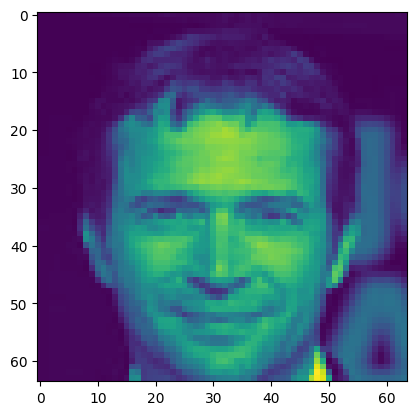

(50000, 64, 64)


In [12]:
from PIL import Image

import os
import numpy as np
filelist = os.listdir('/content/img_align_celeba/img_align_celeba')

images = []

for i in filelist[0:50000]:
  numberized = Image.open('/content/img_align_celeba/img_align_celeba/' + i).crop((20, 30, 160, 180)).convert('L').resize((64,64))
  images.append(np.array(numberized))

import matplotlib.pyplot as plt
plt.imshow(images[1])
plt.show()

images = np.array(images)
print(images.shape)


In [13]:
images = np.divide(images, 255)
images = images.reshape(50000, 64, 64, 1)
print(images.shape)

(50000, 64, 64, 1)


In [20]:
#Discriminator

import tensorflow as tf

discriminator = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64,1]),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Dropout, Flatten, Conv2D, Conv2DTranspose, BatchNormalization
#Generator
noise_shape = 100

generator = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4 * 4 * 256, input_shape=(100,) ),
  tf.keras.layers.Reshape((4, 4, 256)),
  tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')
])

generator.summary()

GAN = tf.keras.models.Sequential([generator, discriminator])
discriminator.compile(optimizer='adam', loss='binary_crossentropy')
discriminator.trainable = False
GAN.compile(optimizer='adam', loss='binary_crossentropy')


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4096)              413696    
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_8 (Conv2D  (None, 8, 8, 256)         590080    
 Transpose)                                                      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 batch_normalization_6 (Bat  (None, 8, 8, 256)         1024      
 chNormalization)                                                
                                                                 
 conv2d_transpose_9 (Conv2D  (None, 16, 16, 128)      

1/1 [==============================] - 0s 210ms/step


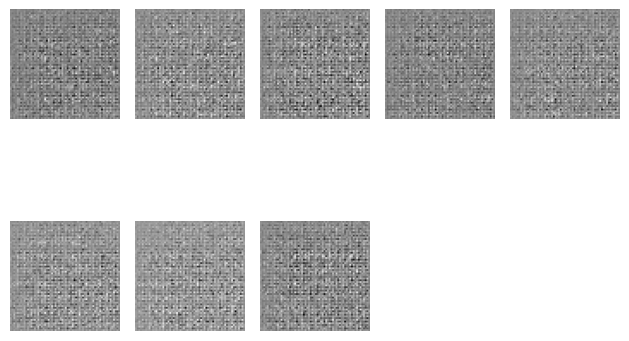

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def predict_pic():
  random = np.random.uniform(-1, 1, size=(8,100))
  predict = generator.predict(random)

  for i in range(8):
    plt.subplot(2, 5, i+1)
    plt.imshow(predict[i].reshape(64,64), cmap='gray')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

predict_pic()

curr epoch 0
1/1 [==============================] - 0s 18ms/step


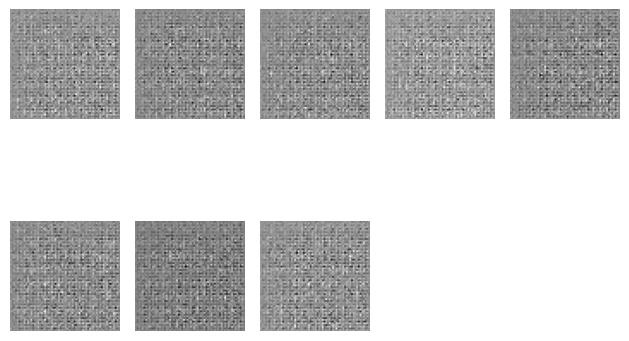

curr batch 0
4/4 [==============================] - 0s 4ms/step
curr batch 100
4/4 [==============================] - 0s 3ms/step
curr batch 200
4/4 [==============================] - 0s 4ms/step
curr batch 300
4/4 [==============================] - 0s 4ms/step
final loss of this epoch is Discriminator: 0.0010190695757046342, GAN: 1.992825673369225e-06
curr epoch 1
1/1 [==============================] - 0s 28ms/step


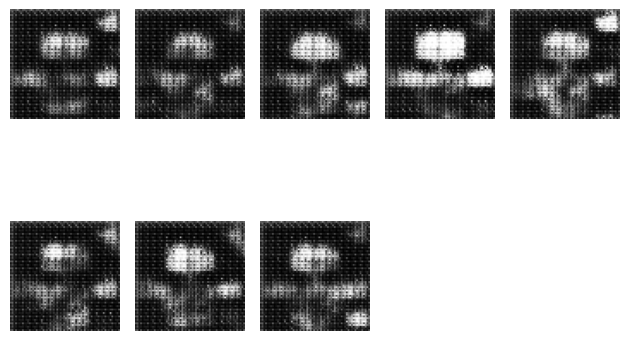

curr batch 0
4/4 [==============================] - 0s 4ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 6ms/step
curr batch 300
4/4 [==============================] - 0s 5ms/step
final loss of this epoch is Discriminator: 0.8842644393444061, GAN: 1.3868274688720703
curr epoch 2
1/1 [==============================] - 0s 19ms/step


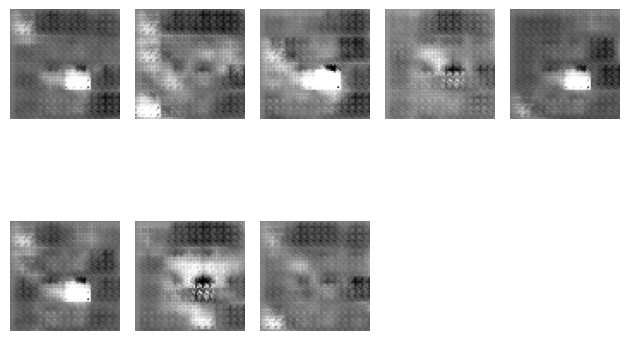

curr batch 0
4/4 [==============================] - 0s 5ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 6ms/step
curr batch 300
4/4 [==============================] - 0s 4ms/step
final loss of this epoch is Discriminator: 1.4758204817771912, GAN: 1.1894590854644775
curr epoch 3
1/1 [==============================] - 0s 17ms/step


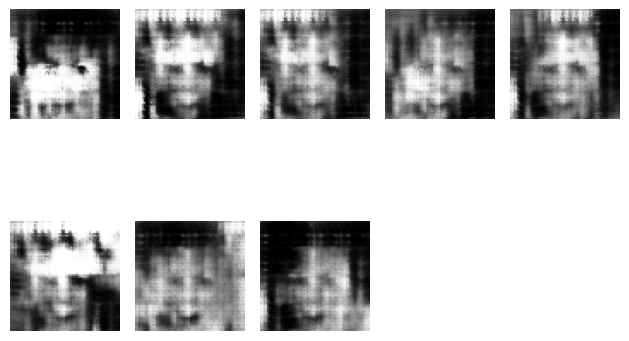

curr batch 0
4/4 [==============================] - 0s 5ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 3ms/step
curr batch 300
4/4 [==============================] - 0s 5ms/step
final loss of this epoch is Discriminator: 1.2539095878601074, GAN: 0.7984545230865479
curr epoch 4
1/1 [==============================] - 0s 27ms/step


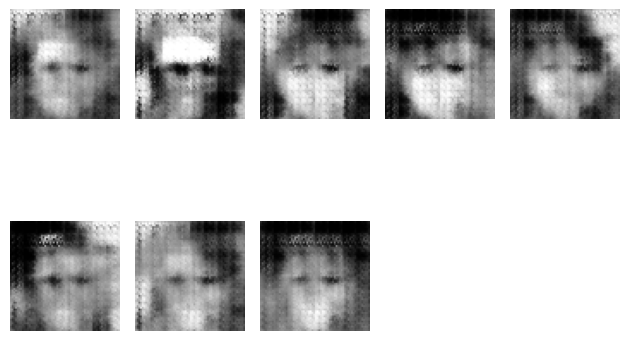

curr batch 0
4/4 [==============================] - 0s 7ms/step
curr batch 100
4/4 [==============================] - 0s 3ms/step
curr batch 200
4/4 [==============================] - 0s 3ms/step
curr batch 300
4/4 [==============================] - 0s 4ms/step
final loss of this epoch is Discriminator: 0.7164283692836761, GAN: 1.3985629081726074
curr epoch 5
1/1 [==============================] - 0s 26ms/step


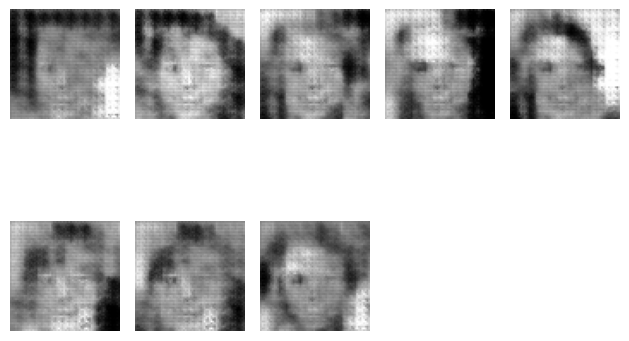

curr batch 0
4/4 [==============================] - 0s 4ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 6ms/step
curr batch 300
4/4 [==============================] - 0s 5ms/step
final loss of this epoch is Discriminator: 1.0592668056488037, GAN: 1.0707685947418213
curr epoch 6
1/1 [==============================] - 0s 18ms/step


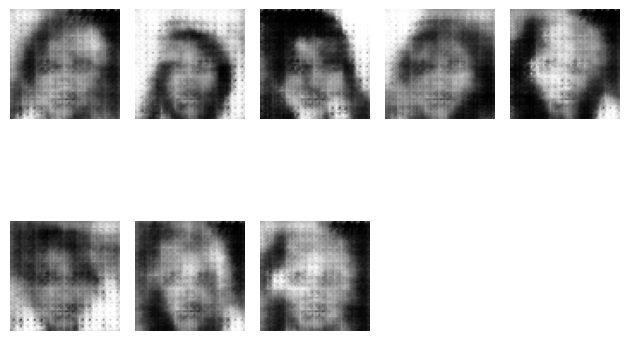

curr batch 0
4/4 [==============================] - 0s 6ms/step
curr batch 100
4/4 [==============================] - 0s 8ms/step
curr batch 200
4/4 [==============================] - 0s 5ms/step
curr batch 300
4/4 [==============================] - 0s 5ms/step
final loss of this epoch is Discriminator: 1.0483263731002808, GAN: 1.051875114440918
curr epoch 7
1/1 [==============================] - 0s 44ms/step


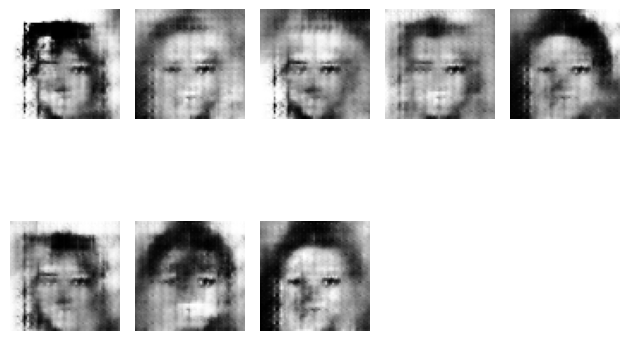

curr batch 0
4/4 [==============================] - 0s 6ms/step
curr batch 100
4/4 [==============================] - 0s 3ms/step
curr batch 200
4/4 [==============================] - 0s 7ms/step
curr batch 300
4/4 [==============================] - 0s 3ms/step
final loss of this epoch is Discriminator: 1.186002492904663, GAN: 1.321455478668213
curr epoch 8
1/1 [==============================] - 0s 18ms/step


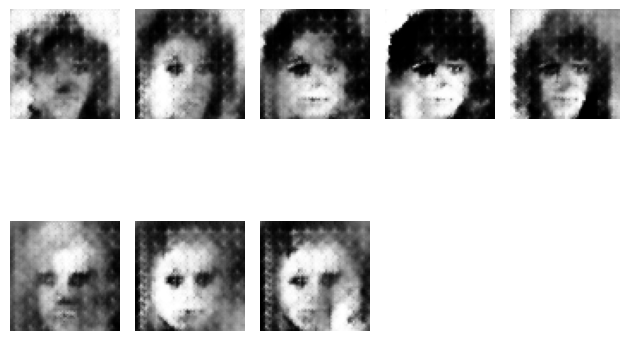

curr batch 0
4/4 [==============================] - 0s 4ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 6ms/step
curr batch 300
4/4 [==============================] - 0s 3ms/step
final loss of this epoch is Discriminator: 1.0935352444648743, GAN: 1.4458792209625244
curr epoch 9
1/1 [==============================] - 0s 19ms/step


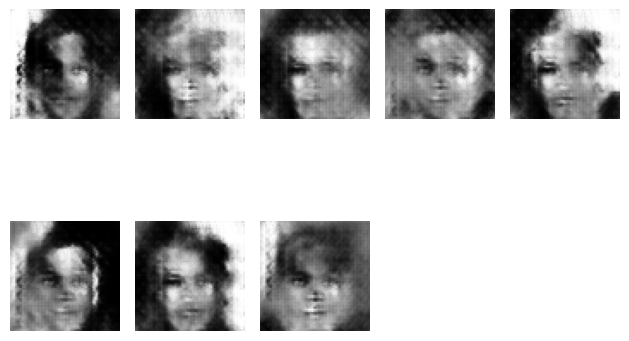

curr batch 0
4/4 [==============================] - 0s 8ms/step
curr batch 100
4/4 [==============================] - 0s 3ms/step
curr batch 200
4/4 [==============================] - 0s 5ms/step
curr batch 300
4/4 [==============================] - 0s 4ms/step
final loss of this epoch is Discriminator: 1.2664278149604797, GAN: 1.3318290710449219
curr epoch 10
1/1 [==============================] - 0s 40ms/step


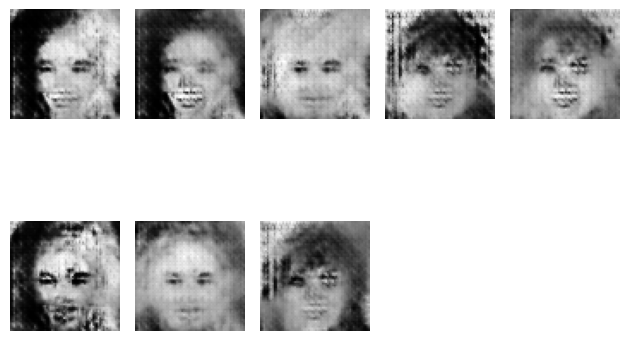

curr batch 0
4/4 [==============================] - 0s 9ms/step
curr batch 100
4/4 [==============================] - 0s 3ms/step
curr batch 200
4/4 [==============================] - 0s 5ms/step
curr batch 300
4/4 [==============================] - 0s 4ms/step
final loss of this epoch is Discriminator: 1.2412267327308655, GAN: 1.016886830329895
curr epoch 11
1/1 [==============================] - 0s 17ms/step


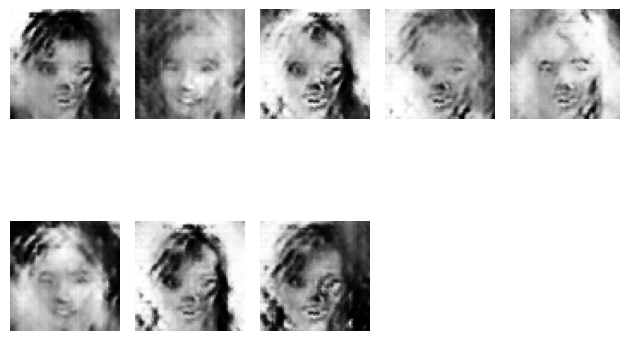

curr batch 0
4/4 [==============================] - 0s 3ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 5ms/step
curr batch 300
4/4 [==============================] - 0s 7ms/step
final loss of this epoch is Discriminator: 1.3342891931533813, GAN: 1.0865007638931274
curr epoch 12
1/1 [==============================] - 0s 18ms/step


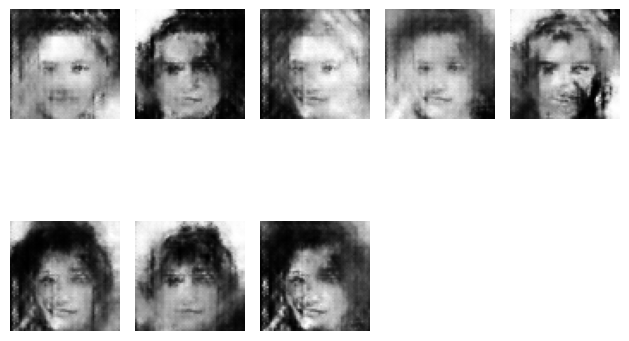

curr batch 0
4/4 [==============================] - 0s 3ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 6ms/step
curr batch 300
4/4 [==============================] - 0s 5ms/step
final loss of this epoch is Discriminator: 1.087740808725357, GAN: 1.119124174118042
curr epoch 13
1/1 [==============================] - 0s 20ms/step


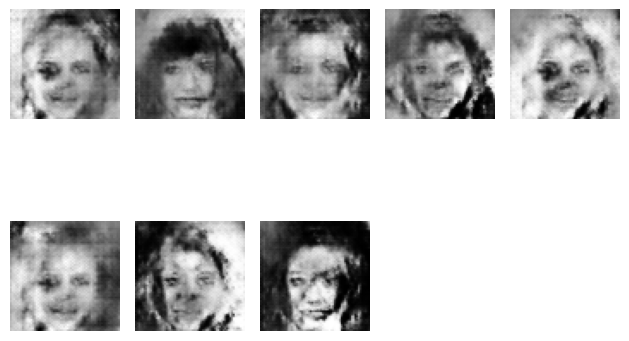

curr batch 0
4/4 [==============================] - 0s 5ms/step
curr batch 100
4/4 [==============================] - 0s 4ms/step
curr batch 200
4/4 [==============================] - 0s 4ms/step
curr batch 300
4/4 [==============================] - 0s 4ms/step
final loss of this epoch is Discriminator: 1.342620611190796, GAN: 1.037087321281433
curr epoch 14
1/1 [==============================] - 0s 24ms/step


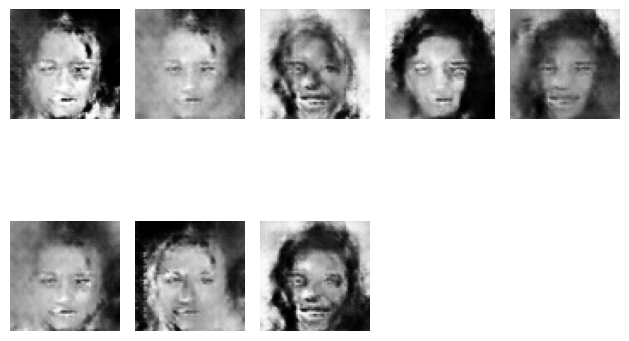

curr batch 0
4/4 [==============================] - 0s 5ms/step
curr batch 100
4/4 [==============================] - 0s 3ms/step
curr batch 200
4/4 [==============================] - 0s 6ms/step
curr batch 300
4/4 [==============================] - 0s 5ms/step
final loss of this epoch is Discriminator: 1.2819611430168152, GAN: 0.9935544729232788
curr epoch 15
1/1 [==============================] - 0s 27ms/step


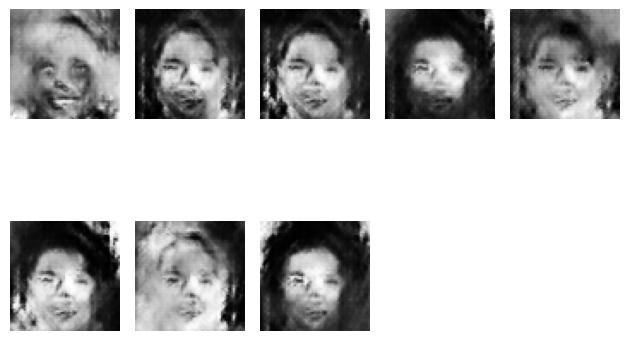

curr batch 0
4/4 [==============================] - 0s 7ms/step
curr batch 100
4/4 [==============================] - 0s 3ms/step
curr batch 200
4/4 [==============================] - 0s 5ms/step
curr batch 300
4/4 [==============================] - 0s 6ms/step
final loss of this epoch is Discriminator: 1.2636951804161072, GAN: 1.0601904392242432
curr epoch 16
1/1 [==============================] - 0s 48ms/step


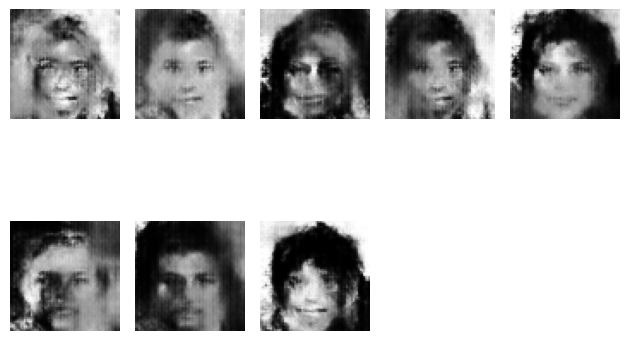

curr batch 0
4/4 [==============================] - 0s 6ms/step
curr batch 100
4/4 [==============================] - 0s 9ms/step
curr batch 200
4/4 [==============================] - 0s 6ms/step
curr batch 300
4/4 [==============================] - 0s 9ms/step
final loss of this epoch is Discriminator: 1.0324326157569885, GAN: 1.230302333831787
curr epoch 17
1/1 [==============================] - 0s 18ms/step


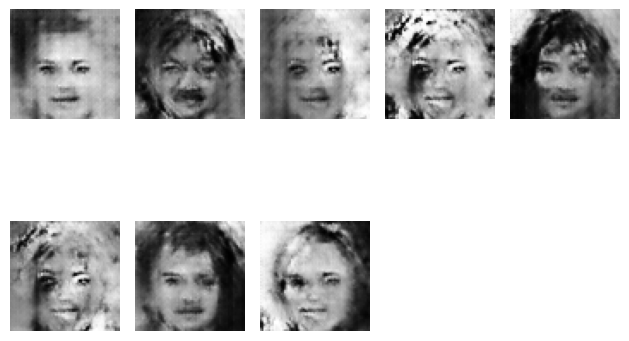

curr batch 0
4/4 [==============================] - 0s 7ms/step
curr batch 100
4/4 [==============================] - 0s 5ms/step
curr batch 200
4/4 [==============================] - 0s 4ms/step
curr batch 300
4/4 [==============================] - 0s 3ms/step
final loss of this epoch is Discriminator: 1.1722913980484009, GAN: 1.0914441347122192
curr epoch 18
1/1 [==============================] - 0s 18ms/step


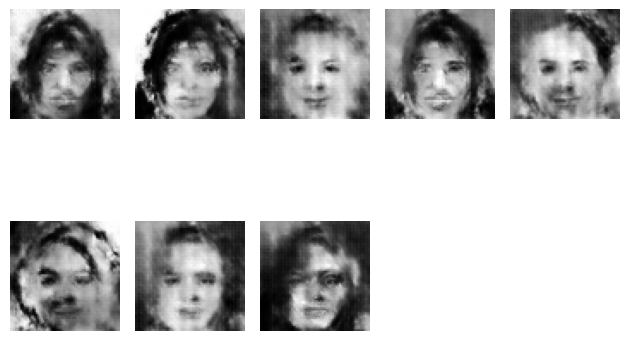

curr batch 0
4/4 [==============================] - 0s 5ms/step
curr batch 100
4/4 [==============================] - 0s 4ms/step
curr batch 200
4/4 [==============================] - 0s 4ms/step
curr batch 300
1/4 [======>.......................] - ETA: 0s

In [ ]:
x_data = images
for j in range(300):
  print(f'curr epoch {j}')
  predict_pic()
  for i in range(50000//128):
    if i % 100 == 0:
      print(f'curr batch {i}')
    real_images = x_data[i*128:(i+1)*128]
    marked1 = np.ones(shape=(128, 1))
    loss1 = discriminator.train_on_batch(real_images, marked1)

    random_number = np.random.uniform(-1, 1, size=(128, 100))
    fake_images = generator.predict(random_number)
    marked0 = np.zeros(shape=(128, 1))
    loss2 = discriminator.train_on_batch(fake_images, marked0)

    random_number = random_number = np.random.uniform(-1, 1, size=(128, 100))
    marked1 = np.ones(shape=(128, 1))

    loss3 = GAN.train_on_batch(random_number, marked1)
  print(f'final loss of this epoch is Discriminator: {loss1 + loss2}, GAN: {loss3}')